 # TP6: Apprentissage profond(Deep learning)
 ## TP6.2 Un modèle multicouches pour une Régression  
 On reprend le TP6.1 on change de modèle on prend un modèle multicouches. 


#### Travail demandé :
Objectif  comparer les performances 
- d'un réseau de neurones simple (un Perceptrion, 1 seul neurone de sortie) (TP 6.1) 
- et un réseau plus dense avec une couche cachée et une couche de sortie composée d'un seul neurone. (TP6.2)

De même nous travaillerons sur deux datasets. Les deux datasets portent sur le housing. On vous propose deux Datasets : 1 (small) à 4 variables et 100 exemples et le second à 13 variables et quelques centaines d'exemples.
<span style="color:green">  L'architecture du réseau à un réel impact sur les résultats </span>

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from sklearn.model_selection import train_test_split


In [37]:
#fonction utile pour calculer le R2 score
from keras import backend as K

def r2_score(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

## Neurone sans activation - Régression linéaire

### 1. Sélection des données 
On utilisera les données houses.
On comence tout d'abord par le petit  (Small) Dataset puis on refait le process en prenant le Large dataset.

#### Small dataset

In [38]:
# lecture du fichier texte.
from sklearn.model_selection import train_test_split
data=pd.read_csv("../../data/houses.txt", header=None)
data = data.rename(columns={0: 'Surf', 1: 'Nbpieces', 2: 'nbEtage', 3: 'Age', 4:'Prix'})
X= data.drop('Prix',  axis=1)
y=data['Prix']



In [39]:
## affichage des noms de colonnes (variables du modèle) 
X.columns

Index(['Surf', 'Nbpieces', 'nbEtage', 'Age'], dtype='object')

## 2 Préparation des données

#### Split des données 

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)
print(X.shape, y.shape, X_test.shape, y_test.shape)

(100, 4) (100,) (20, 4) (20,)


#### 2.1  Normalisation des données

In [41]:
## On peut utiliser une simple normalisation (x-mu)/ecart type)
# C'est une standardisation la même que StandardScaler de scikit learn
mean = X_train.mean()
std  = X_train.std()
X_train = (X_train - mean) / std
# Normalisation des données de test
X_test  = (X_test  - mean) / std

X_train.head()

,Surf,Nbpieces,nbEtage,Age
55,-0.493677,-1.046034,-0.729199,-0.988102
88,-0.892728,0.396771,-0.729199,0.883783
26,-0.978238,-1.046034,-0.729199,0.454810
42,0.874497,1.839576,1.354226,2.638676
69,0.036016,0.396771,-0.729199,0.766790


### 3. Construction (définition) du modèle 
On construite un modèle de régression linéaire. La fonction mise en œuvre par un neurone sans activation est la même que la régression linéaire du chapire 2.:
$$ f_{\mathbf{w},b}(x^{(i)}) = \mathbf{w}\cdot x^{(i)} + b \tag{1}$$

La définition d'un modèle exige le choix d'un certains nombre d'options (fonctions):  
- [Optimizer:](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers ) C'est l'algorithme d'apprentissage utilisé pour optimiser les paramètres
- [Activation:](https://www.tensorflow.org/api_docs/python/tf/keras/activations): `sigmoid`, `linear`, `relu`, ...
- [Loss :](https://www.tensorflow.org/api_docs/python/tf/keras/losses) fonctions d'erreurs, `mse`, `BinaryCrossentropy`, `CategoricalCrossentropy`, ...
- [Metrics :](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) `Accuracy`, `F1Score`,`mae`, `mse`...
    


## 3.1 Un modèle plus complexe  
Construire un réseau comportant : 
- une couche d'entrée
- une couche cachée à 32 neurones
- une couche de sortie 

In [42]:
# Le modèle 
m = X_train.shape[1] # nombre de variables
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(m, name='input_layer'))
model.add(tf.keras.layers.Dense(units=32, activation='linear'))
model.add(tf.keras.layers.Dense(units=1, activation='linear', name='output'))





In [43]:
#Compiler le modèle
model.compile(optimizer='adam', loss='mse', metrics=['mae', r2_score])





In [44]:
#affichage du modèle
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                160       
                                                                 
 output (Dense)              (None, 1)                 33        
                                                                 
Total params: 193 (772.00 Byte)
Trainable params: 193 (772.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 4. Entrainement du modèle (Model training)

In [47]:
# Entrainement du modele
model.fit(X_train, y_train, epochs=100000, batch_size=32, verbose=1)
print (model.metrics_names)

Epoch 1/100000
3/3 [==============================] - 0s 3ms/step - loss: 136072.3750 - mae: 356.3954 - r2_score: -12.1723
Epoch 2/100000
3/3 [==============================] - 0s 4ms/step - loss: 135952.7188 - mae: 356.2621 - r2_score: -13.1768
Epoch 3/100000
3/3 [==============================] - 0s 4ms/step - loss: 135840.8125 - mae: 356.1341 - r2_score: -13.1468
Epoch 4/100000
3/3 [==============================] - 0s 4ms/step - loss: 135708.2031 - mae: 355.9831 - r2_score: -14.1097
Epoch 5/100000
3/3 [==============================] - 0s 2ms/step - loss: 135606.2812 - mae: 355.8729 - r2_score: -12.1484
Epoch 6/100000
3/3 [==============================] - 0s 3ms/step - loss: 135477.0625 - mae: 355.7241 - r2_score: -13.4896
Epoch 7/100000
3/3 [==============================] - 0s 4ms/step - loss: 135352.5938 - mae: 355.5810 - r2_score: -12.5181
Epoch 8/100000
3/3 [==============================] - 0s 3ms/step - loss: 135224.2188 - mae: 355.4377 - r2_score: -12.2892
Epoch 9/100000
3

KeyboardInterrupt: 

### 5. Evaluation des performances du modèle 
- Afficher tous les scores.


In [48]:
# Evaluation du modèle
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test mae:', scores[1])
print('Test r2_score:', scores[2])


1/1 [==============================] - 0s 198ms/step - loss: 587.2458 - mae: 20.7476 - r2_score: 0.9526
Test loss: 587.2457885742188
Test mae: 20.747560501098633
Test r2_score: 0.952593982219696


### Historique du training (training history)
On peut afficher l'historique de l'apprentissge. 
On peut aussi afficher les courbes 

In [50]:
# import history
history = model.fit(X_train, y_train, epochs=300, batch_size=32, verbose=1)
print(history.params)
print(history.history.keys())
#Min loss
print(np.min(history.history['loss']))

Epoch 1/300
3/3 [==============================] - 0s 3ms/step - loss: 409.5641 - mae: 16.0869 - r2_score: 0.9608
Epoch 2/300
3/3 [==============================] - 0s 3ms/step - loss: 409.6502 - mae: 16.0796 - r2_score: 0.9584
Epoch 3/300
3/3 [==============================] - 0s 3ms/step - loss: 409.7550 - mae: 16.0755 - r2_score: 0.9578
Epoch 4/300
3/3 [==============================] - 0s 3ms/step - loss: 409.5596 - mae: 16.0724 - r2_score: 0.9613
Epoch 5/300
3/3 [==============================] - 0s 4ms/step - loss: 409.8456 - mae: 16.0814 - r2_score: 0.9634
Epoch 6/300
3/3 [==============================] - 0s 3ms/step - loss: 409.6315 - mae: 16.0816 - r2_score: 0.9584
Epoch 7/300
3/3 [==============================] - 0s 3ms/step - loss: 409.5744 - mae: 16.0857 - r2_score: 0.9599
Epoch 8/300
3/3 [==============================] - 0s 3ms/step - loss: 409.6207 - mae: 16.0905 - r2_score: 0.9536
Epoch 9/300
3/3 [==============================] - 0s 4ms/step - loss: 409.6050 - mae: 1

In [51]:
import pandas as pd 
df=pd.DataFrame(data=history.history)
display(df)

,loss,mae,r2_score
0,409.564117,16.086924,0.960759
1,409.650238,16.079639,0.958440
2,409.754974,16.075512,0.957820
3,409.559601,16.072430,0.961260
4,409.845642,16.081381,0.963354
...,...,...,...
295,410.210876,16.136377,0.950866
296,409.801758,16.129124,0.962707
297,409.544403,16.123535,0.953029
298,409.883240,16.122187,0.957045


Text(0.5, 0, 'Epoch')

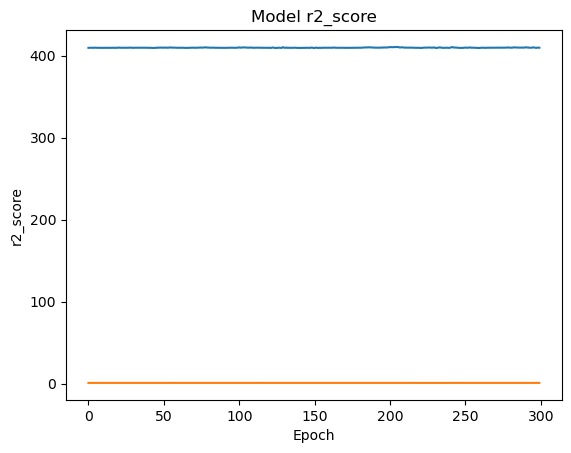

In [52]:
import matplotlib.pyplot as plt

# Plotting the loss curve
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')




# Plotting the r2_score curve

plt.plot(history.history['r2_score'])
plt.title('Model r2_score')
plt.ylabel('r2_score')
plt.xlabel('Epoch')



### 6. Faire des prédictions


In [54]:
#Small Sata set
my_data = [ 0.126918, 0.417687, 1.374513, -0.502325 ]
real_price = 350.00 # ce que vous devriez obtenir doit être proche de ce prix




In [55]:
# écrire le code ici 
pred = model.predict(np.array(my_data).reshape(1,4))
print(pred)




1/1 [==============================] - 0s 119ms/step
[[338.66095]]


<details>
<summary>
    <font size='3', color='darkgreen'><b>Attention au format de l'entrée, sinon essayez ...</b></font>
</summary>
    my_data=np.array(my_data).reshape(1,4)


### Exercice
I- Comparer les performances obtenues par les deux modèles 
- 1) Le perceptron et le modèle multicouches sur les deux datasets?
- 2) Modifier la structure du réseau dense
    - augmenter le nombre de neurones par couche
    - augmenter le nombre de couches. 
    
Quel est le réseau qui donne le meilleur résultat ?

II- Refaire les questions de l'exercice en considérant le Dataset ci dessous un peu plus large.
Le nom des variables est différent du fichier précédent (mais on reste dans la prédiction du prix d'un bien immobilier, ici median_house_value)

#### Large Dataset

In [58]:
# lecture du fichier texte.
data = pd.read_csv('../../data/housing.csv', header=0)

data.dropna(axis=0, inplace=True)
print('Missing Data : ',data.isna().sum().sum(), '  Shape is : ', data.shape)

X = data.drop('median_house_value',  axis=1)
y = data['median_house_value']

Missing Data :  0   Shape is :  (20433, 10)


In [60]:
## affichage des noms de colonnes (variables du modèle) 
X.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [61]:
## affichage des noms de colonnes (variables du modèle)
X.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [62]:
#split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)
print(X.shape, y.shape, X_test.shape, y_test.shape)

(20433, 9) (20433,) (4087, 9) (4087,)


In [63]:
# Normalisation des données
mean = X_train.mean()
std  = X_train.std()
X_train = (X_train - mean) / std
# Normalisation des données de test
X_test  = (X_test  - mean) / std
X_train.head()

C:\Users\Baran\AppData\Local\Temp\ipykernel_24744\3338743124.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = X_train.mean()
C:\Users\Baran\AppData\Local\Temp\ipykernel_24744\3338743124.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std  = X_train.std()


,households,housing_median_age,latitude,longitude,median_income,ocean_proximity,population,total_bedrooms,total_rooms
17743,0.054438,0.427736,-0.764868,0.804252,0.342493,NaN,0.461324,0.002015,0.060354
2060,0.100896,-1.316855,1.353377,-1.611128,-1.433529,NaN,-0.443158,0.168456,-0.159913
6443,0.170584,1.855128,0.994115,-1.332238,-0.450244,NaN,0.036611,0.062965,0.003031
4616,-0.820532,-0.285961,-0.830189,0.794291,0.003616,NaN,-0.611820,-0.640304,-0.730440
15277,-0.299163,0.507035,-0.564241,-0.062297,-0.659287,NaN,-0.674740,-0.398848,-0.560275


In [65]:
# Le modèle
m = X_train.shape[1] # nombre de variables
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(m, name='input_layer'))
model.add(tf.keras.layers.Dense(units=32, activation='linear'))
model.add(tf.keras.layers.Dense(units=1, activation='linear', name='output'))


In [66]:
#Compiler le modèle
model.compile(optimizer='adam', loss='mse', metrics=['mae', r2_score])

In [67]:
# Entrainement du modele
model.fit(X_train, y_train, epochs=500, batch_size=32, verbose=1)
print (model.metrics_names)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

In [68]:
# Evaluation du modèle
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test mae:', scores[1])
print('Test r2_score:', scores[2])

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

In [69]:
# import history
history = model.fit(X_train, y_train, epochs=300, batch_size=32, verbose=1)
print(history.params)
print(history.history.keys())
#Min loss
print(np.min(history.history['loss']))

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

Text(0.5, 0, 'Epoch')

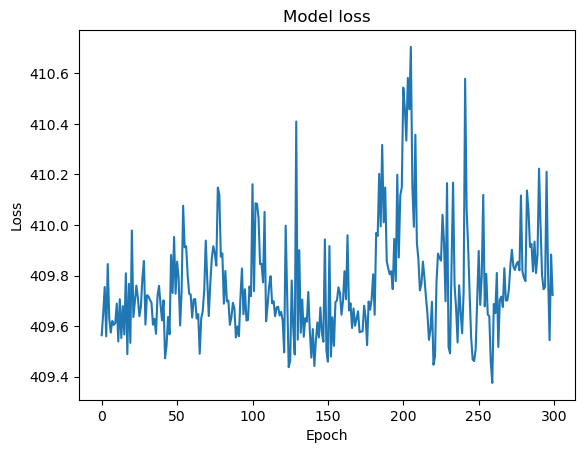

In [70]:
# Plotting the loss curve
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

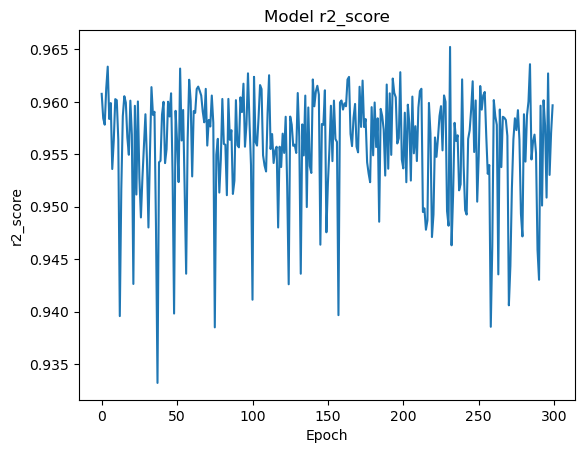

In [71]:
# Plotting the r2_score curve
plt.plot(history.history['r2_score'])
plt.title('Model r2_score')
plt.ylabel('r2_score')
plt.xlabel('Epoch')

In [72]:
# prediction sur un exemple
my_data = [ 0.126918, 0.417687, 1.374513, -0.502325, 0.771950, -0.849853, 0.743330, -0.970176, 0.3
, 0.771950, -0.849853, 0.743330, -0.970176, 0.3 ]
real_price = 350.00 # ce que vous devriez obtenir doit être proche de ce prix

In [73]:
predict = model.predict(np.array(my_data).reshape(1,13))
print(predict)

ValueError: cannot reshape array of size 14 into shape (1,13)